In [1]:
%matplotlib widget

In [2]:
import crspectra
import cycler
import matplotlib.pyplot
import numpy


In [3]:
matplotlib.style.use(["seaborn-v0_8-notebook", "seaborn-v0_8-ticks"])


In [4]:
matplotlib.rcParams["lines.markersize"] *= 0.5
matplotlib.rcParams["lines.linewidth"] *= 0.5


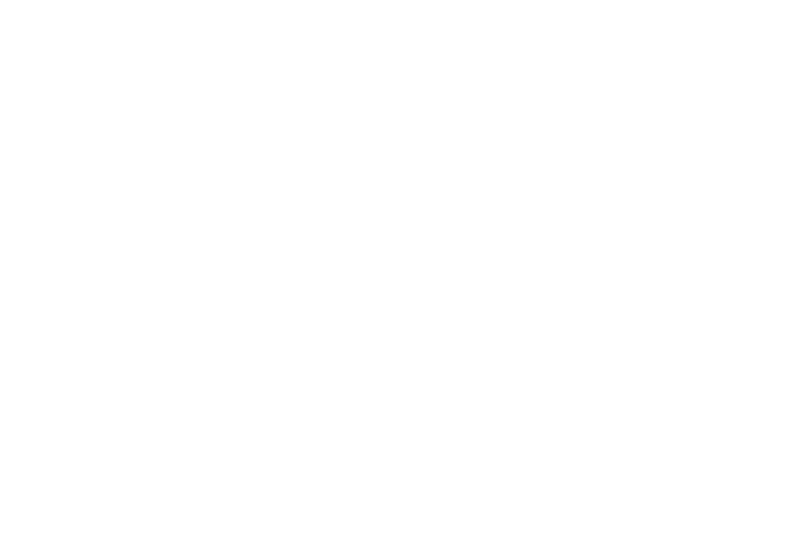

In [5]:
fig = matplotlib.pyplot.figure()


In [6]:
gridspec = matplotlib.pyplot.GridSpec(nrows=1, ncols=1)


In [7]:
ax = fig.add_subplot(gridspec[0, 0])


In [8]:
experiments = [
    "AMS-02",
    "CREAM-I/III (protons)",
    "HAWC",
    "Tibet-III (QGSJet-01c, HD)",
    "IceTop-73",
    "GAMMA",
    "KASCADE (QGSJet-I)",
    "KASCADE-Grande",
    "HiRes/MIA",
    "HiRes-I/II",
    "Auger",
]


In [9]:
prop_cycle = cycler.cycler(
    color=matplotlib.cm.Spectral(matplotlib.colors.Normalize(vmin=0, vmax=5)(range(6)))
) * cycler.cycler(marker=["o", "v"])


In [10]:
with crspectra.connect() as database:
    for experiment, props in zip(experiments, prop_cycle()):
        if experiment == "AMS-02":
            data = database.from_external("AMS02", element="H", energy="ETOT")
        elif experiment == "HiRes-I/II":
            data = numpy.hstack((database["HiRes-I"], database["HiRes-II"]))
        else:
            data = database[experiment]

        data = data[~data["uplim"]]

        if experiment == "CREAM-I/III (protons)":
            label = "CREAM-I/III"
        else:
            label = experiment

        ax.errorbar(
            data["energy"],
            data["flux"] * data["energy"],
            data["stat"].T * data["energy"],
            fmt=props["marker"],
            color=props["color"],
            label=label,
        )


In [11]:
ax.loglog(nonpositive="clip")


[]

In [12]:
ax.set_xlim(1.0, 1e12)
ax.set_ylim(1e-18, 1e6)


(1e-18, 1000000.0)

In [13]:
ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(numticks=14))
ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(subs=range(1, 11), numticks=14))
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


In [14]:
ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=27))
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


In [15]:
ax.set_xlabel(r"$E$ [GeV]")
ax.set_ylabel(r"$E \Phi$ [m$^{-2}\,$sr$^{-1}\,$s$^{-1}$]")


Text(56.00449178059896, 0.5, '$E \\Phi$ [m$^{-2}\\,$sr$^{-1}\\,$s$^{-1}$]')

In [16]:
handles, labels = ax.get_legend_handles_labels()


In [17]:
legend = ax.legend(handles[:2], labels[:2], loc="lower left", title="Protons:")
ax.add_artist(legend)


In [18]:
legend = ax.legend(handles[2:], labels[2:], loc="upper right", title="All-particle:")


In [19]:
gridspec.tight_layout(fig)


In [20]:
fig.savefig("crspectra.png")
